In [1]:
!pip3 install seaborn

import seaborn
import pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
file_path = "./dataset/Shill Bidding Dataset.csv"

df = pandas.read_csv(file_path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [3]:
df.groupby("Successive_Outbidding")["Successive_Outbidding"].count()

Successive_Outbidding
0.0    5478
0.5     374
1.0     469
Name: Successive_Outbidding, dtype: int64

In [4]:
df["Record_ID"] = df["Record_ID"].astype("str")
df["Auction_ID"] = df["Auction_ID"].astype("str")
df["Successive_Outbidding"] = df["Successive_Outbidding"].astype("str")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   object 
 1   Auction_ID              6321 non-null   object 
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   object 
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 642.1+ KB


# Perfil dos dados

Colunas: 13.

Registros: 6321.

Existem 3 atributos que poderiam ser considerados categóricos (Record_ID, Auction_ID, Bidder_ID), mas como são apenas dados de identificação do registro, não serão utilizados para a classificação.

O Successive_Outbidding, embora não esteja declarado explicitamente como um dado categórico e não haja legenda para os valores que pode adotar, na prática age como um atributo categórico por só adotar 3 possíveis valores.

Todos os demais atributos são numéricos.

# Checando existência de dados nulos
Como podemos ver na consulta abaixo, não há dados nulos.

In [5]:
df.isnull().sum()

Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

# Checando registros duplicados
Como podemos ver na consulta abaixo, não há dados duplicados.

In [6]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


# Distribuição de dados numéricos

In [7]:
df.describe()

,Bidder_Tendency,Bidding_Ratio,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,0.142541,0.127670,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,0.197084,0.131530,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.027027,0.043478,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,0.062500,0.083333,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,0.166667,0.166667,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


- Podemos ver que não há nenhum valor negativo nos dados numéricos, o que é algo positivo pois nada na descrição dos dados dá a entender que existiriam. Caso houvesse algum registro com valores negativos, seria um bom indicador de sujeira nos dados.

- Em alguns dados, principalmente Bidder_Tendency, Bidding_Ration e Auction_Bids, o valor máximo está muito distante do 75% percentil, indicando a possível existência de outliers. Essa possibilidade será averiguada nos gráficos boxplot.


<AxesSubplot:>

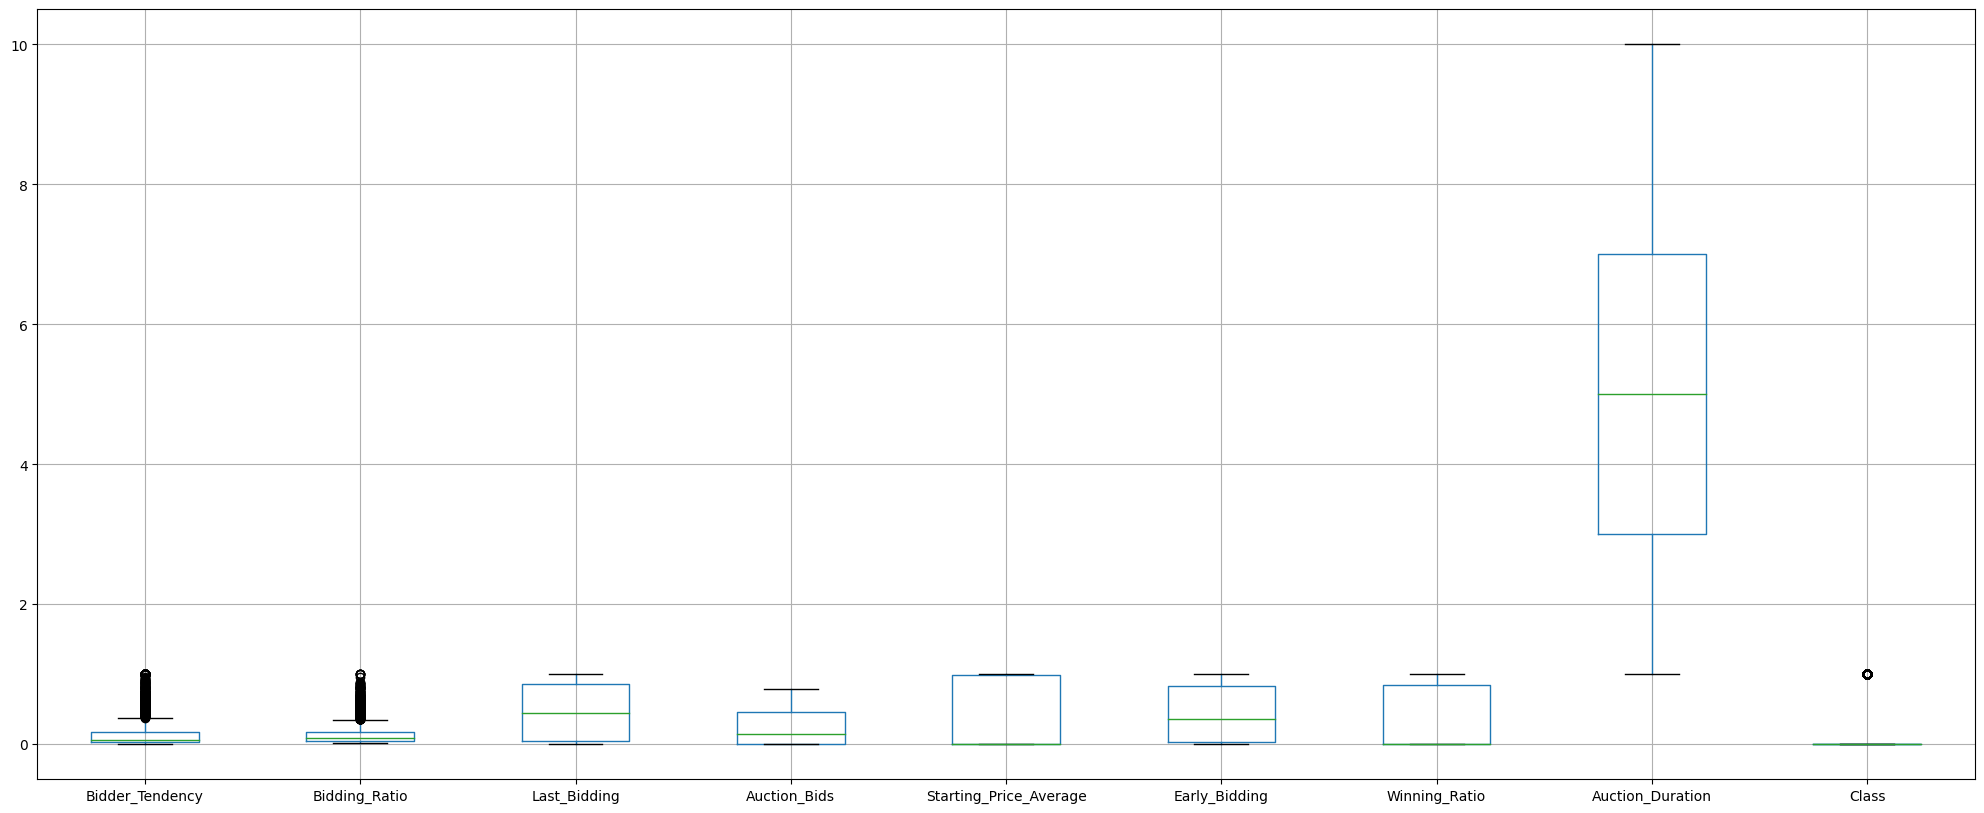

In [8]:
df.boxplot(figsize=(25, 10))

- De fato, Bidder_Tendency e Bidding_Ratio possuem outliers. Porém, os 2 são atributos muito relevantes pois o Bidder Tendency indica a participação em auctions com poucos compradores, e o Bidding Ratio indica participação frequente pra aumentar o preço, ambos grandes indicativos de fraude. Como temos poucos registros positivos de comportamento fraudulento, podemos entender que esses indicadores aparentam ser outliers pois definem muito bem comportamento fraudulento, e naturalmente ocorrem menos vezes nesses valores altos. Concluindo, não devemos remover esses valores, pois na prática não são outliers. Mais detalhes sobre a distribuição das classes de registros mais adiante. 

- Os outliers em Class serão desconsiderados pois essa é a label do problema, e consiste de 0's e 1's. Porém, é um bom indicativo de que talvez o dataset esteja desbalanceado. Essa possibilidade será averiguada logo a seguir.


# Distribuição de dados categóricos
Como só temos 1 atributo categórico, que é o Successive_Outbidding, analisamos apenas ele.

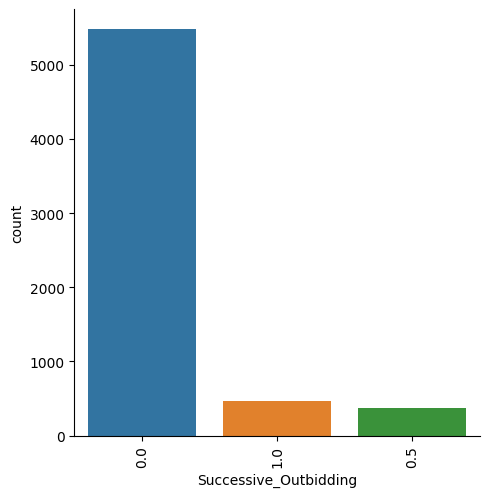

In [8]:
fig = seaborn.catplot(x="Successive_Outbidding", kind="count", data=df)
fig.set_xticklabels(rotation=90)

Levando em consideração o significado de Successive_Outbidding, que é configurado por uma pessoa continuar dando lances maiores mesmo quando está vencendo um leilão, podemos entender que valores maiores que zero estão fortemente atrelados ao comportamento fraudulento. A frequência maior do valor 0 provavelmente está ligada ao fato do dataset ter mais registros de comportamento normal do que de comportamento fraudulento (mais informações adiante).

# Distribuição das classes

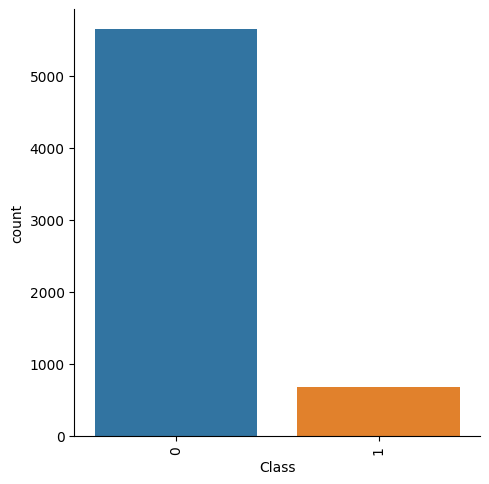

In [10]:
fig = seaborn.catplot(x="Class", kind="count", data=df)
fig.set_xticklabels(rotation=90)

Como podemos ver na distribuição, temos bem mais registros cuja classe é 0, do que registros cuja classe é 1.

Isso é um problema sério durante o treinamento de modelos, pois pode enviesá-lo a assumir classes negativas com mais frequência. Como já temos poucos registros para trabalhar, cortar registros da classe mais representada pode ser muito prejudicial.

Assim, alguma técnica de Data Augmentation precisará ser utilizada para incrementar o número de exemplo da classe menos representada.

Uma possível solução seria simplesmente replicar o número de registros até que as classes estivessem balanceadas, mas com isso corremos um sério risco de overfitting para esses dados registrados.